In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

In [2]:
train = pd.read_csv('data/train.csv')
train

,userId,movieId,rating
0,210427,1641,5.0
1,155232,48414,3.5
2,226717,3698,4.0
3,176213,272,3.0
4,68678,423,3.0
...,...,...,...
8710063,43132,3638,3.0
8710064,184361,4701,3.5
8710065,125759,290,3.0
8710066,208890,3686,4.0


In [3]:
test = pd.read_csv('data/test.csv')
test

,userId,movieId,rating
0,51361,2262,4.0
1,43362,2355,4.0
2,254067,4638,2.5
3,90209,4226,4.5
4,204458,61724,4.0
...,...,...,...
2177513,128316,5618,4.5
2177514,225158,575,3.0
2177515,160630,1580,4.0
2177516,231078,247,4.0


In [4]:
movies = pd.read_csv('data/movies.csv')

In [12]:
from sklearn.metrics import ndcg_score
from ipywidgets import IntProgress
from IPython.display import display

test_users = test['userId'].unique()[:10000]
def evaluate(r):
    progress = IntProgress(min=0, max=len(test_users))
    display(progress)

    scores = []
    for user in test_users:
        progress.value += 1

        user_test: np.ndarray = test[test['userId'] == user] \
            .sort_values('rating', ascending=False)['movieId'] \
            .to_numpy()
        
        rankings = r.rank(user, user_test)
        score = ndcg_score([user_test], [rankings], k=5)
        scores.append(score)

    return scores

In [13]:
import trivial_rankers as tr
reload(tr)

vote_based = tr.VoteAverageBasedRanker(movies, train)
weighted_vote_based = tr.WeightedVoteBasedRanker(movies, train)

vote_based_scores = evaluate(vote_based)
weighted_vote_based_scores = evaluate(weighted_vote_based)

IntProgress(value=0, max=10000)

IntProgress(value=0, max=10000)

In [14]:
import vectorizer_based_rankers as vbr
reload(vbr)

overview_based = vbr.OverviewBasedRanker(movies, train)
keywords_based = vbr.KeywordsBasedRanker(movies, train)

overview_based_scores = evaluate(overview_based)
keywords_based_scores = evaluate(keywords_based)

IntProgress(value=0, max=10000)

IntProgress(value=0, max=10000)

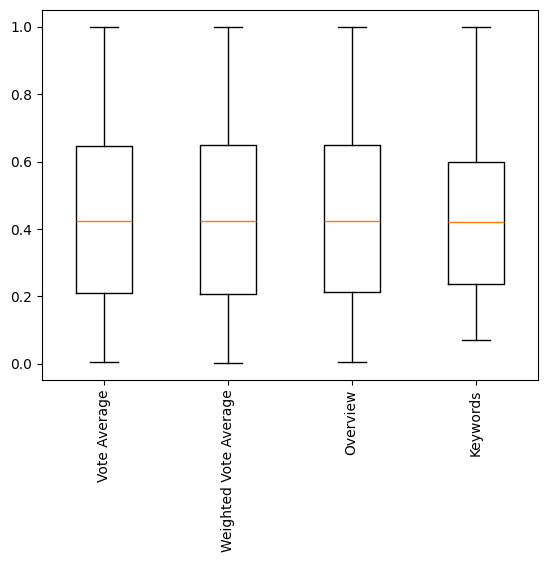

In [15]:
plt.boxplot([vote_based_scores, weighted_vote_based_scores, overview_based_scores, keywords_based_scores])
plt.xticks([1, 2, 3, 4], ['Vote Average', 'Weighted Vote Average', 'Overview', 'Keywords'], rotation=90)
plt.show()